# Cloud Services

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import boto3
from os import path

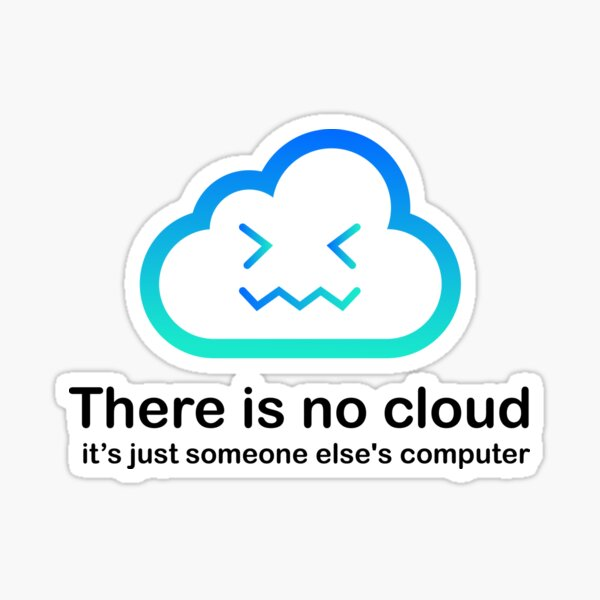

## Learning Goals

 - Use the `pickle` library to read and write files;
 - Explain the general concept of "the cloud";
 - Understand the cases where _hardware acceleration_ is useful;
 - Understand the cases where _cloud storage_ is useful;
 - Explain the purpose of deploying a machine learning model.

## Outline

There are several services available in the cloud:

1. Hardware acceleration
2. Cloud storage
3. Model serving

## Hardware Acceleration

As much as software libraries like NumPy or Spark can improve the efficiency of code, there is a limit to how much of a difference they can make, depending on the actual hardware of your computer.

As a general concept, [hardware acceleration](https://www.omnisci.com/learn/resources/technical-glossary/hardware-acceleration) means using purpose-built hardware rather than general-purpose hardware.

In the case of machine learning, this typically means running your code on a GPU, rather than a CPU.  A CPU _can_ do everything that a GPU can do, but it is not optimized for it, so it will likely take more time.  [This blog](https://towardsdatascience.com/maximize-your-gpu-dollars-a9133f4e546a) argues that a CPU is to a GPU as a horse and buggy is to a car.

Sometimes you want to use cloud computing just for the GPU!

### Cloud Services with Hardware Acceleration

There is a lot of overlap between these services and the services listed on the Deployment page, but you may need to configure them specifically to indicate that you want to use a GPU:

 - [AWS EC2](https://aws.amazon.com/blogs/machine-learning/train-deep-learning-models-on-gpus-using-amazon-ec2-spot-instances/)
 - [Google Cloud Platform](https://cloud.google.com/ml-engine/docs/using-gpus)
 - [IBM Watson Studio](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml_dlaas_gpus.html)
 - [Azure VM](https://docs.microsoft.com/en-us/azure/virtual-machines/linux/sizes-gpu)

There are also some cloud IDEs with GPUs, where you can run Jupyter Notebook code:

 - [AWS Sagemaker](https://aws.amazon.com/machine-learning/accelerate-machine-learning-P3/) (there are labs in Canvas introducing Sagemaker — it is fairly fast and easy to use, but can get expensive quickly with large datasets)
 - [Databricks Community Edition](https://community.cloud.databricks.com/)
 - [Google Colab](https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c)
 - [Kaggle kernels](https://www.kaggle.com/dansbecker/running-kaggle-kernels-with-a-gpu)

You can also upload Jupyter notebooks to data.world.

Because there is a GPU available in the free tier, Google Colab is the most popular of these tools for our students. [Here](https://medium.com/@sam.bbmgmt/integrating-google-drive-colab-with-github-bffaca97eb5b) is a blog post from a former student explaining how to use the file system!

### Demo

Let's upload the same notebook to a couple different platforms, as an illustration.

## Cloud Storage

It's annoying to have huge data files taking up space on your laptop, and if you want to train your model in the cloud, your data also needs to be in the cloud.  But for reasons related to hardware acceleration, it can get pretty expensive to store large datasets in general-purpose cloud services like an EC2 instance or a cloud VM.  That's when cloud storage services become useful.

### Cloud Storage Buckets

The major providers of storage "buckets" are:

 - [AWS S3](https://aws.amazon.com/s3/getting-started/)
 - [Google Cloud Storage](https://cloud.google.com/storage/)
 - [Azure Storage](https://docs.microsoft.com/en-us/azure/storage/common/storage-introduction)

These tools are designed for uploads of raw files, e.g. folders full of images, CSVs, or JSONs.

They each cost about 2-5 cents per GB per month.  AWS S3 is the oldest and tends to have the most integration support with other platforms, although you may need to use Google storage if you're using other Google products or Azure storage if you're using other Azure products.

### Cloud Databases

If you want to deploy a website where new information gets saved (what kinds of queries users perform, user ratings of the quality of predictions, etc.) then you need a cloud database.  These work roughly the same as a database running on your computer.

Using a cloud database is mainly an opportunity to practice using tooling that you are likely to use on the job, because they assist with collaboration.

Some popular providers are:

 - [Heroku Postgres](https://www.heroku.com/postgres)
 - [MongoDB Atlas](https://www.mongodb.com/cloud/atlas)
 - [AWS Aurora](https://aws.amazon.com/rds/aurora/)
 - [AWS RDS](https://aws.amazon.com/rds/)

Most of these tools have a free tier, which permits a limited number of records to be stored.

### Links to Other Resources

 - [Introduction to AWS for Data Scientists](https://www.dataquest.io/blog/introduction-to-aws-for-data-scientists/)

## Deployment

Here we have resources for three different techniques for deploying a machine learning model:
1. Full-stack web application
2. Cloud function
3. ML-specific deployment

### Full-Stack Web Application Example: Flask
Flask means developing a full-stack web application. It follows a model-view-controller (MVC) pattern and requires that you sometimes have to follow a "convention over configuration" pattern and put certain files in certain folders.

There are two main ways I recommend deploying a Flask app: [Heroku](https://devcenter.heroku.com/articles/deploying-python), or [AWS EC2](https://www.codementor.io/dushyantbgs/deploying-a-flask-application-to-aws-gnva38cf0). The main difference is that Heroku uses "dynos", a type of container that gets fully re-created when the site is "woken up" based on certain config files it finds in a GitHub repo.  EC2 is more like a "real" computer, where you can SSH in and download things, log out, log back in, and those things will still be there.  EC2 gives you more configuration capabilities and more computational power, but also requires more setup than Heroku.

#### Pricing
[Heroku free tier](https://www.heroku.com/pricing) allows one web app for free. The [AWS free tier](https://aws.amazon.com/ec2/pricing/) allows 750 hours of "micro" level server time per month.

#### Pros
 - Free
 - Allows you to become more familiar with web development and have a shared vocabulary with software developers
 - You can generate data visualizations in Python (don't need to learn JavaScript, only HTML and CSS)
 - Supports a multi-step process with more than one user interaction
 - Single solution to get a live user interface you can link from your portfolio

#### Cons
 - Learning curve for all of Flask can be steep
 - More systems administration work than a cloud function or ML model
 - Less realistic workflow (unless you are the only technical person on your team, you will probably not be expected to set up a web server)
 
#### Documentation
 - [Flask app repo from 0624 cohort](https://github.com/learn-co-students/capstone-flask-app-template-seattle-ds-062419)
 - [Flask quickstart documentation](https://flask.palletsprojects.com/en/1.1.x/quickstart/)

#### Flask Demo

Political NLP Predictor at `~/flatiron/inauguralNLP`:

Let's
- check out the "app.py" file; and
- run it.

## Pickling for Deployment Example

This shows the basic outline for training a model, evaluating it, then using it in a "production" context to make predictions about new data.

### 1. Extract, Transform, Load Data

This is easy here because I'm using a nice tidy dataset from sklearn

In [2]:
# get premade wine dataset from sklearn

data = load_wine()

In [3]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 2. Build a Model to Make Predictions

In [4]:
# let's build a model to predict the class of wine

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
classifier = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

### 3. Evaluate the Model

Not necessarily the most realistic performance, but let's go with it!

In [5]:
classifier.score(X_test, y_test)

1.0

In [6]:
metrics.confusion_matrix(y_test, classifier.predict(X_test))

array([[18,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 12]])

### 4. Export the Model

As far as I can tell, the [`pickle` format](https://docs.python.org/3/library/pickle.html) is most popular for this task in Python right now. Pickling is a form of serialization or flattening, which basically means converting everything about an object in memory into bits of data that can be stored in a file.

In [7]:
output_file = open("wine_classifier.pickle", "wb") # "wb" means "write as bytes"
pickle.dump(classifier, output_file)
output_file.close()

### 5. Load the Model

This part would actually almost never be in the same file as the previous step. The goal is to take information that was stored in memory at one time, then save it so it can be used later. Here specifically this is useful because training a model is usually a lot slower than using the model to make a prediction, so this saves us from having to re-run that costly operation each time.

In [8]:
model_file = open("wine_classifier.pickle", "rb") # "rb" means "read as bytes"
loaded_model = pickle.load(model_file)
model_file.close()

### 6. Make a Prediction with the Loaded Model

In this section I'm constructing a request JSON that resembles what would come from a user who wants a predicted class of wine based on these feature values. This code would not actually exist in your deployed application, it would be created automatically by whatever protocol generated the request.

In [9]:
# make a fake request JSON from the user with all the headings

request_json = {}

expected_features = ("Alcohol", "Malic acid", "Ash", "Alcalinity of ash", \
        "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", \
        "Proanthocyanins", "Color intensity", "Hue", \
        "OD280/OD315 of diluted wines", "Proline")
example_values = [1.282e+01, 3.370e+00, 2.300e+00, 1.950e+01, 8.800e+01, 1.480e+00, \
       6.600e-01, 4.000e-01, 9.700e-01, 1.026e+01, 7.200e-01, 1.750e+00, \
       6.850e+02]

for i, feature in enumerate(expected_features):
    request_json[feature] = example_values[i]
request_json

{'Alcohol': 12.82,
 'Malic acid': 3.37,
 'Ash': 2.3,
 'Alcalinity of ash': 19.5,
 'Magnesium': 88.0,
 'Total phenols': 1.48,
 'Flavanoids': 0.66,
 'Nonflavanoid phenols': 0.4,
 'Proanthocyanins': 0.97,
 'Color intensity': 10.26,
 'Hue': 0.72,
 'OD280/OD315 of diluted wines': 1.75,
 'Proline': 685.0}

This is the section that more closely resembles what you might have in your application. I'm checking to make sure that the expected values are in the request_json, transforming them into the right format to make a prediction, then printing out that prediction. In your actual deployed code, you would most likely be **returning** the response, not printing it.

In [10]:
if request_json and all(feature in request_json for feature in expected_features):
    
    # unpack all of the relevant values from the request into a list
    
    test_value = [request_json[feature] for feature in expected_features]
    
    # make a prediction from the "user input"
    
    predicted_class = int(loaded_model.predict([test_value])[0])
    
    # construct a response
    
    response_json = {"prediction": predicted_class}
    print(response_json)
else:
    print("something was missing from the request")

{'prediction': 2}


## AWS S3 Buckets Example

### Assumptions
 - Working from a Jupyter notebook locally
 - Not concerned about access or keeping data private

For the purpose of this lesson, the `wine_classifier.pickle` file has already been uploaded to Greg's AWS account.  To make your pickle file available from code, you would need to make an account and upload the file.

### CLI Interface
Installation instructions [here](https://docs.aws.amazon.com/cli/latest/userguide/install-cliv2.html), CLI docs [here](https://docs.aws.amazon.com/cli/latest/reference/s3/).  You will need to use this to upload large files (somewhere around 160 MB) but it's clunkier than integrating directly into Python and won't work with all deployment techniques.

In [14]:
#!aws s3 cp s3://flatiron-ds-2020-07-28/wine_classifier.pickle wine_classifier.pickle

/bin/bash: aws: command not found


### Python Code

In [15]:
BUCKET = "greg-flatiron-example"
PICKLE_FILE = "wine_classifier.pickle"
CSV_FILE = "wine.csv"

### Boto 3
This is an SDK for connecting Python to S3 buckets.  Docs [here](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html). This is a good tool for large pickle files.

In [16]:
#!conda install boto3 -y

s3 = boto3.resource("s3")

obj = s3.Object(BUCKET, PICKLE_FILE)

obj.get()

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/aeakland/opt/anaconda3/envs/learn-env

  added / updated specs:
    - boto3


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> pkgs/main::ca-certificates-2021.10.26-hecd8cb5_2
  certifi            conda-forge::certifi-2021.10.8-py38h5~ --> pkgs/main::certifi-2021.10.8-py38hecd8cb5_2
  openssl            conda-forge::openssl-1.1.1l-h0d85af4_0 --> pkgs/main::openssl-1.1.1m-hca72f7f_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


NoCredentialsError: Unable to locate credentials

In [17]:
response_body = obj.get()["Body"].read()
response_body[:100]

NoCredentialsError: Unable to locate credentials

In [ ]:
loaded_model = pickle.loads(response_body)

loaded_model.get_params()

### Pandas

If you are trying to load a CSV rather than a pickle, you can do that directly in Pandas!  First you'll need to install `S3FS` (docs [here](https://s3fs.readthedocs.io/en/latest/)) which allows Python to access S3 buckets like they are part of the local file system.  

In [18]:
#!conda install s3fs -c conda-forge -y

file_path = path.join("s3://", BUCKET, CSV_FILE)

df = pd.read_csv(file_path)
df.head()

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
| 

ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

## Level-Ups

### Cloud Function Example: Google Cloud Functions

Google Cloud Functions allow you to make a single function that can be called from a REST API interface.  The Python language versions are actually running on top of Flask, with as much boilerplate removed as possible.  So you still need to learn some Flask to be able to get everything working.

#### Pricing

Up to 2 million free Cloud Function invocations per month. The [free tier](https://cloud.google.com/free/) requires signing up with a credit card, but promises "No autocharge after free trial ends".

#### Pros

 - Free
 - Makes a REST API interface, so you can demo with Postman or an HTML + JS web frontend (or collaborate with an SE alum to make a React frontend for you)
 - Only requires you to learn a little bit of Flask.  Nothing about production WSGI servers, or nginx, or ports.

#### Cons

 - Not making a full-stack web app means you won't have the experience of making a full-stack web app.
 - Sometimes there is a lot of "magic" happening with the implicit Flask app that makes it hard to debug. Probably will not be compatible with TensorFlow, for example, because you don't have fine-grained control over the threading behavior.
 - If you want to deploy a web frontend, you'll need to find another tool. (GitHub Pages works fine though!)
 - The platform is not designed specifically for ML models, so it might be annoyingly slow, or even so slow that it times out.
 - You can't generate any data visualizations in Python; they will have to be in JavaScript.

#### Documentation

1. [Writing cloud functions](https://cloud.google.com/functions/docs/writing/http)
2. [Deploying cloud functions](https://cloud.google.com/functions/docs/deploying/filesystem)
3. [Calling cloud functions](https://cloud.google.com/functions/docs/calling/http)

#### Example

Erin Hoffman has a working example of a Google Cloud function in the `google_cloud_function` folder. You can call it right now by pasting this into your terminal:
```
curl -X POST -H "Content-type: application/json" -d '{"Alcohol": 12.82, "Malic acid": 3.37, "Ash": 2.3, "Alcalinity of ash": 19.5, "Magnesium": 88.0, "Total phenols": 1.48, "Flavanoids": 0.66, "Nonflavanoid phenols": 0.4, "Proanthocyanins": 0.97, "Color intensity": 10.26, "Hue": 0.72, "OD280/OD315 of diluted wines": 1.75, "Proline": 685.0}' https://us-central1-splendid-petal-256700.cloudfunctions.net/wine-predictor
```

### ML-Specific Deployment Example: Google Cloud AI Platform

Google Cloud AI Platform allows you to upload an exported model to the cloud, then make future requests to the cloud to make new predictions. The primary use case seems to be people who are already very integrated into the Google Cloud ecosystem, since they encourage requesting predictions through their custom SDK in Python rather than through a standard REST API interface.

#### Pricing

It looks like there is no free tier for this service. [Pricing summary here.](https://cloud.google.com/ml-engine/docs/pricing)

#### Pros

 - After installing their CLI, you only need to upload the model itself, no additional libraries or frameworks.
 - If you need better performance, it's easy to pay more money to get that.
 - This is a "real" tool that you might encounter on the job, and resembles most closely the type of systems administration you might need to do on the job.
 - If you need to use TensorFlow, Google made both TensorFlow and this product, so they're likely to be the most compatible.

#### Cons

 - Not free.
 - No clear, easy way to make an "open" REST API that can communicate with Postman or a simple web frontend.
 - Requires versioning and other configuration work that is not necessary for our projects.

#### Documentation

1. [Exporting models for prediction](https://cloud.google.com/ml-engine/docs/exporting-for-prediction)
2. [Deploying models](https://cloud.google.com/ml-engine/docs/deploying-models)
3. [Getting online predictions in Python](https://cloud.google.com/ml-engine/docs/online-predict), [Getting online predictions via REST](https://cloud.google.com/ml-engine/docs/v1/predict-request)

### Other Examples

**Full-Stack Web Development**
 - If you really want to dive into full-stack web development, [Django](https://www.djangoproject.com/start/) has more features than Flask.
 - Besides Heroku and AWS EC2, you can also host websites with [Azure App Service](https://docs.microsoft.com/en-us/learn/modules/host-a-web-app-with-azure-app-service/index), [DigitalOcean](https://www.digitalocean.com/community/tutorials/how-to-deploy-a-flask-application-on-an-ubuntu-vps), [Google Cloud App Engine](https://cloud.google.com/python/getting-started/hello-world), and [AWS Elatic Beanstalk](https://docs.aws.amazon.com/elasticbeanstalk/latest/dg/Welcome.html).
 
**Cloud Functions**
 - [AWS Lambda Functions](https://docs.aws.amazon.com/lambda/latest/dg/python-programming-model.html)
 - [Azure Functions](https://docs.microsoft.com/en-us/azure/azure-functions/functions-create-first-function-python)
 
**ML-Specific Deployment**
 - [IBM Watson Studio](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html)  (kind of a mixture between a cloud function and ML-specific deployment)
 - [AWS SageMaker](https://docs.aws.amazon.com/sagemaker/latest/dg/whatis.html)
 - [Azure Machine Learning](https://docs.microsoft.com/en-us/python/api/overview/azure/ml/intro?view=azure-ml-py )

### Oracle Cloud Instances

Oracle Cloud Instances are similar to AWS EC2 instances: basically a complete "computer" that runs in the cloud, and that you interact with via SSH in the terminal.

Oracle seems to be trying to match the services provided by AWS, Google Cloud, and Azure, and is attracting customers by making the free tier of their "instance" service pretty fast/powerful.

#### Prerequisites

These instructions assume that you already have a working, production-ready Flask application, where all of the relevant files (including the pickled model) have been pushed up into a single public GitHub repository.

The repository should have a `requirements.txt` in it, which was generated with `pip freeze > requirements.txt`.

#### Step 1: Making the Cloud Instance

Go to the [Oracle Cloud Infrastructure website](https://www.oracle.com/cloud/), click on "Try Oracle Cloud Free Tier", click on "Start for Free", and go through the account creation flow. It will require you to enter credit card information. Choose the region closest to you.

From your homepage, click on "Create a VM Instance".

The trickiest part here is getting the SSH key connected.  The combination of public and private keys is used _instead of_ a traditional username/password login. You provide the public key when setting up your instance and provide the private key when logging in.

Assuming you set up GitHub correctly back in Week 1, you should not need to generate a new SSH key. It should already be located on your computer at `~/.ssh/id_rsa.pub`. Because the `.ssh` directory starts with a `.`, the Mac OS will not automatically show it to you when you click "Choose Files", so you need to type `Command+Shift+G` (`⇧⌘G`) from the Finder window and then type `~/.ssh` into the textbox and select `id_rsa.pub` from the folder once it's opened.

Once the status of the cloud instance turns green and says RUNNING, you should be able to log into your cloud instance!

#### Step 2: Logging in

Your cloud instance is basically like any other Unix-like computer, which can be accessed via the command line.

To connect, first find the public IP address from the "Instance Details" page. It is under the "Primary VNIC Information" header.

In a Terminal window on your local computer, use the SSH command to connect. The format is:
```
ssh opc@<ip_address> —i <private_key>
```

(You may not actually need the last part starting with `-i` depending on your computer's configuration, but I think it's helpful to be explicit)

Now you should see a command prompt, something like:
```
[opc@instance-XXXXXXXX-XXXX ~]$
```

This is a Bash prompt, which works very similarly to the one on your Mac. Try some basic commands like `ls` or `pwd`!

You can disconnect by typing `exit` and hitting Enter.

#### Step 3: Installing Python, Pip, and Git

Oracle Linux uses the [YUM package manager](http://yum.baseurl.org/), which is roughly similar to Homebrew on a Mac.

To install Python 3 and Pip 3, run:
```
sudo yum install python3
```

If that worked correctly, you should be able to run `which python3` and `which pip3` and it will print out the paths to the executables.

To install Git, run:
```
sudo yum install git
```

Now if you run `git status` from the root directory, you should get an error message saying that it is not a git repository.

#### Step 4: Cloning the Flask App and Installing Dependencies

As long as the repository is public on GitHub, this should work the same as cloning any other repository. Just a typical:
```
git clone <repository_link>
cd <repository_name>
```

From the repository, you'll want to install of the Python package dependencies.

To install all packages specified in `requirements.txt`, run:
```
sudo pip3 install -r requirements.txt
```

It will give you a warning message for the reason mentioned above (it's not a best practice to install Pip packages globally rather than using a `conda` or `virtualenv` environment) then proceed to install all of the necessary packages.

To test that your Flask app can run without errors, test out running it:
```
export FLASK_ENV=production
python3 app.py
```

You won't be able to test it in a browser until the network settings are configured, though!

#### Step 5: Configuring Network Settings

As far as I can tell, you must use two different interfaces to specify which ports should accept incoming requests. For these examples, we are assuming that the default port for Flask is used (port 5000).

First, configure from the "console" in the browser where you manage cloud instances. Do this by navigating to "Networking" --> "Virtual Cloud Networks" in the main menu, selecting your network (should be only one, created by default), selecting "Security Lists" in the bottom left menu, selecting "Default Security List", then clicking the blue "Add Ingress Rules" button.  In that pop-up window, enter `0.0.0.0/0` in the SOURCE CIDR field and 5000 in the DESTINATION PORT RANGE field, then click the blue "Add Ingress Rules" button at the bottom.

Second, configure the firewall on the server itself to accept requests on that port. Making sure that you are SSH-ed in to your instance (seeing the prompt with `opc@instance`), run the lines:
```
sudo firewall-cmd --zone=public --permanent --add-port=5000/tcp
sudo firewall-cmd --reload
```

Now, if you run the code to start your Flask app again, you should be able to access it in your local browser!  Just type the public IP address followed by the port, e.g. `http://129.146.133.106:5000/`

#### Step 6: Using `tmux` to Run Indefinitely

With the current setup, the web server only runs as long as the SSH session is live. This is fine even for demo-ing at showcase, but if you actually want the website to work whenever someone wants to view it, the web server needs to be detached from the SSH session.

The typical tool used for this is [`tmux`](https://tmuxguide.readthedocs.io/en/latest/tmux/tmux.html).

Just once, you need to install `tmux`:
```
sudo yum install tmux
```

After that, the process for starting your cloud-hosted web server is:
```
tmux
export FLASK_ENV=production
python3 app.py
```

Then press `control-b`, then release both keys, then press `d`, in order to detach from the `tmux` session.

Now your web server will keep running, even if you log out of SSH!

If you want to log in and stop the web server, or inspect the logs, first SSH back in, then run `tmux attach`.